# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:
from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [2]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


In [5]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


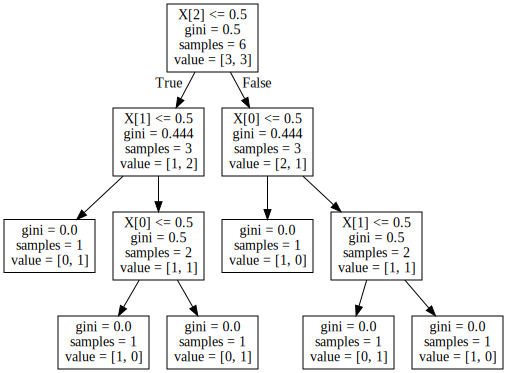

In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [9]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [10]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [11]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [12]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [13]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=4.9, sepal width (c

# Obtain model performance results

In [14]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [16]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [17]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [18]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


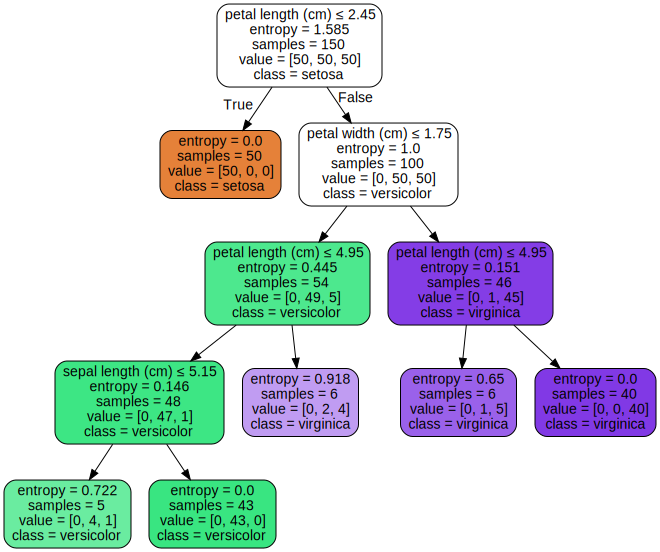

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Predictions:
[1 2 1 0 0 0 2 1 2 0] 

True classes:
[1 1 1 0 0 0 2 1 2 0] 

['setosa' 'versicolor' 'virginica'] 

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa

Errori totali commessi  1
Accuracy score: 0.9
F1 score: 0.8857142857142858


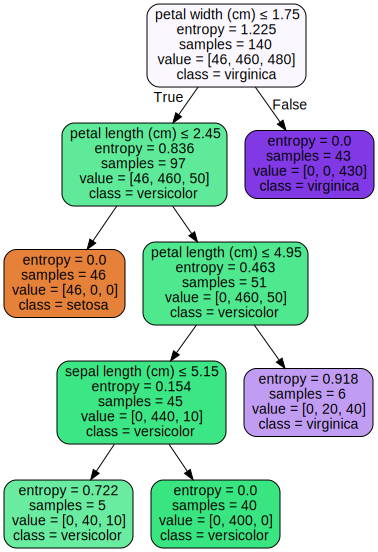

In [20]:
#weigh more the classes virginica e versicolor which are more difficult to discriminate
clf_with_different_weight = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:10,2:10})
clf_with_different_weight = clf_with_different_weight.fit(iris_X_train, iris_y_train)

# apply fitted model "clf" to the test set 
predicted_y_test = clf_with_different_weight.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test,"\n")
print("True classes:")
print(iris_y_test,"\n") 
print(iris.target_names,"\n")

# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")
print("Errori totali commessi ",len(np.where(predicted_y_test[i]!=iris_y_test)))

acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

dot_data = tree.export_graphviz(clf_with_different_weight, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Predictions:
[1. 2. 1. 0. 0. 0. 2. 1. 2. 0.] 

True classes:
[1 1 1 0 0 0 2 1 2 0] 

['setosa' 'versicolor' 'virginica'] 

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa

Errori totali commessi  1
Accuracy score: 0.9
F1 score: 0.8857142857142858


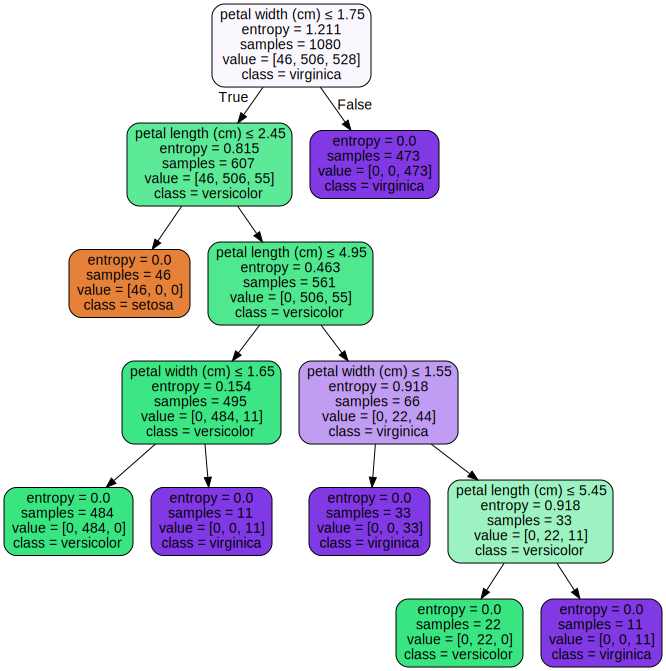

In [21]:
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV

iris_X_train = iris.data[indices_training]  
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] 
iris_y_test  = iris.target[indices_test]

#Versicolor
versicolor_indices = np.where(iris_y_train==1)
X_train_versicolor = iris_X_train[versicolor_indices]
Y_train_versicolor = iris_y_train[versicolor_indices]
#Virginica
virginica_indices  = np.where(iris_y_train==2)
X_train_virginica = iris_X_train[virginica_indices]
Y_train_virginica = iris_y_train[virginica_indices]

#Merge delle X train con le Y train
iris_virginica_train = np.column_stack((X_train_virginica,Y_train_virginica))
iris_versicolor_train = np.column_stack((X_train_versicolor,Y_train_versicolor))
#Inflation 
iris_virginica_train = np.repeat(iris_virginica_train,10, axis=0)
iris_versicolor_train = np.repeat(iris_versicolor_train,10, axis=0)
#Train originario
iris_stacked_train = np.column_stack((iris_X_train,iris_y_train))
#Aggiunta degli esempi virginica e versicolor moltiplicati al train originario
augmented_iris_train = np.row_stack((iris_stacked_train,iris_virginica_train,iris_versicolor_train))
np.random.shuffle(augmented_iris_train)
augmented_iris_train = Bunch(data = np.copy(augmented_iris_train[:, 0:4]),target = np.copy(augmented_iris_train[:,4]))


clf_with_inflation = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf_with_inflation = clf_with_inflation.fit(augmented_iris_train.data, augmented_iris_train.target)
predicted_y_test = clf_with_inflation.predict(iris_X_test)
print("Predictions:")
print(predicted_y_test,"\n")
print("True classes:")
print(iris_y_test,"\n") 
print(iris.target_names,"\n")

# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[int(predicted_y_test[i])]+"\t True: "+iris.target_names[int(iris_y_test[i])]+"\n")
print("Errori totali commessi ",len(np.where(predicted_y_test[i]!=iris_y_test)))

acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

dot_data = tree.export_graphviz(clf_with_inflation, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


C:\Users\Angelo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Angelo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Score :  0.9785714285714285  , i parametri migliori sono:  {'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3}
Predictions:
[1 2 1 0 0 0 2 1 2 0] 

True classes:
[1 1 1 0 0 0 2 1 2 0] 

['setosa' 'versicolor' 'virginica'] 

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa

Errori totali commessi  1
Accuracy score: 0.9
F1 score: 0.8857142857142858


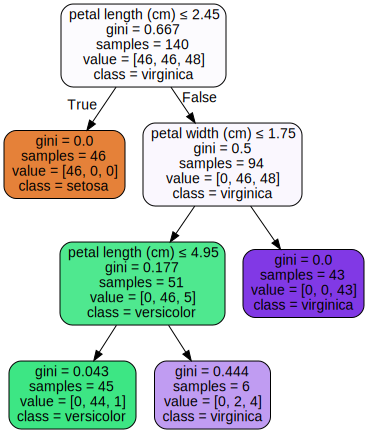

In [22]:
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(3,20),'max_leaf_nodes':range(3,20),'min_impurity_decrease':np.linspace(0,1,11)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(iris_X_train, iris_y_train)
best_tree_model = clf.best_estimator_
print ("Score : ",clf.best_score_," , i parametri migliori sono: ",clf.best_params_)

predicted_y_test2 = best_tree_model.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test2,"\n")
print("True classes:")
print(iris_y_test,"\n") 
print(iris.target_names,"\n")

# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[int(predicted_y_test2[i])]+"\t True: "+iris.target_names[int(iris_y_test[i])]+"\n")
print("Errori totali commessi ",len(np.where(predicted_y_test2[i]!=iris_y_test)))

acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

dot_data = tree.export_graphviz(best_tree_model, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


In [23]:
#np.bincount(iris_y_train)
#np.bincount(augmented_iris_train.target.astype(np.int))
from sklearn.metrics import confusion_matrix
print("La matrice di confusione del miglior modello è : \n",confusion_matrix(iris_y_test, predicted_y_test2,labels=[0,1,2]))

La matrice di confusione del miglior modello è : 
 [[4 0 0]
 [0 3 1]
 [0 0 2]]


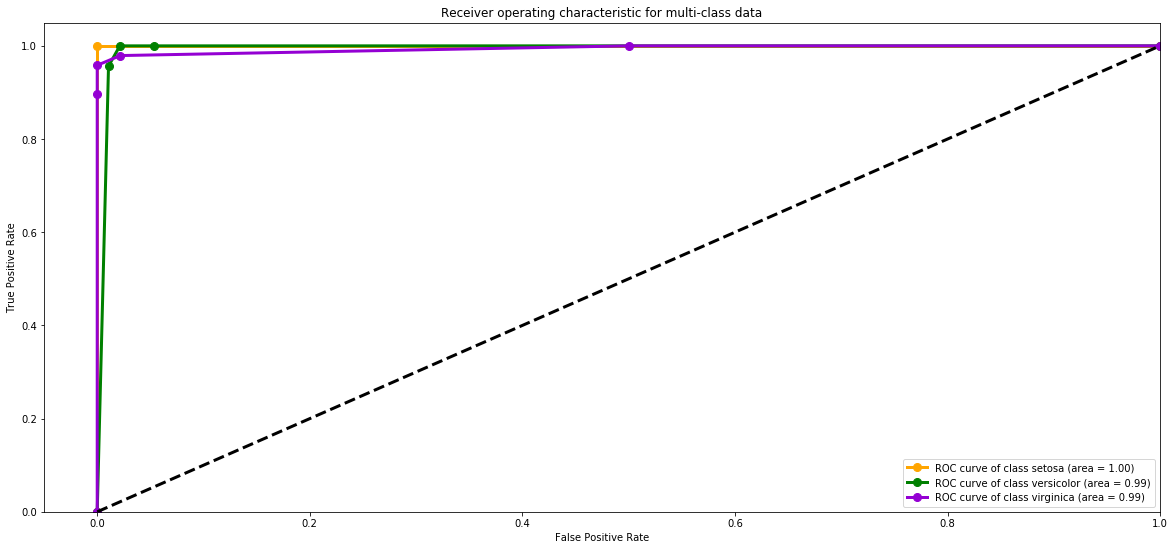

In [49]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
classifier = OneVsRestClassifier(best_tree_model)
y_score = classifier.fit(iris_X_train, iris_y_train).predict_proba(iris_X_train)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,3):
    fpr[i], tpr[i], _ = roc_curve(iris_y_train, y_score[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
colors = ["orange","green","darkviolet"]
for i in range(0,3):
    plt.plot(fpr[i], tpr[i], lw=3, marker ='o', markersize=8, color = colors[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(iris.target_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = [20,9]
plt.show()


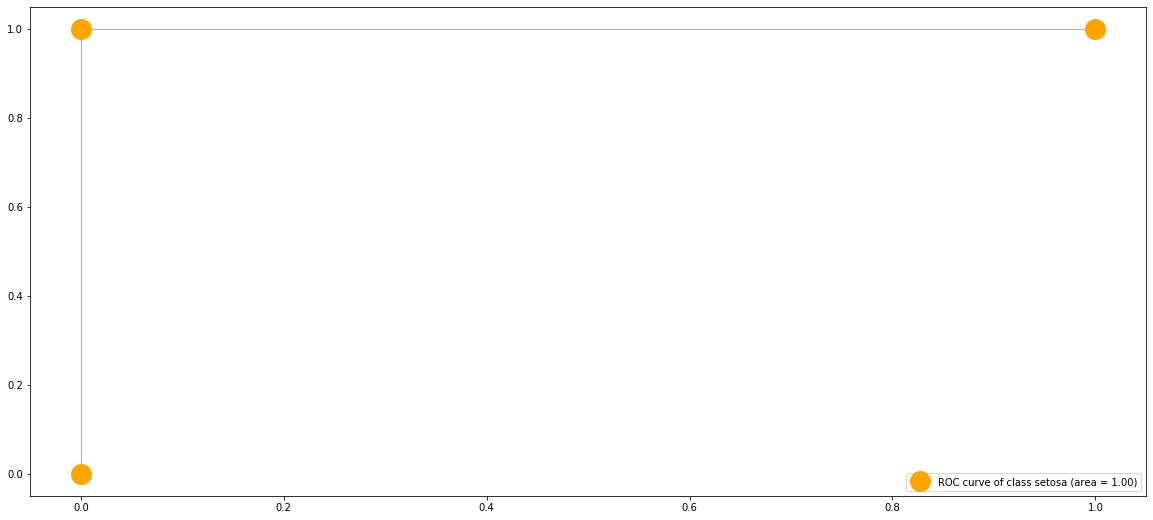

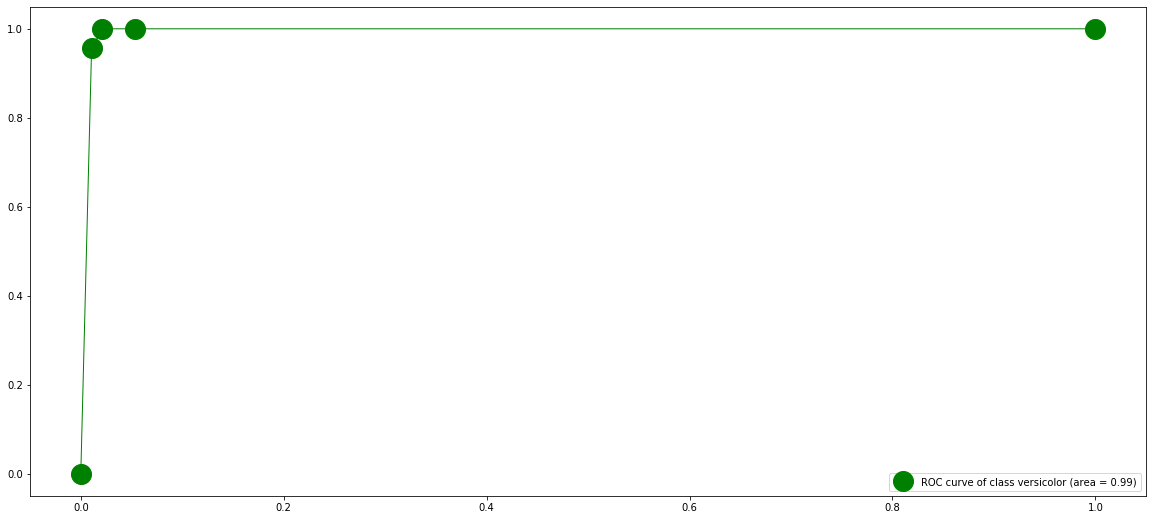

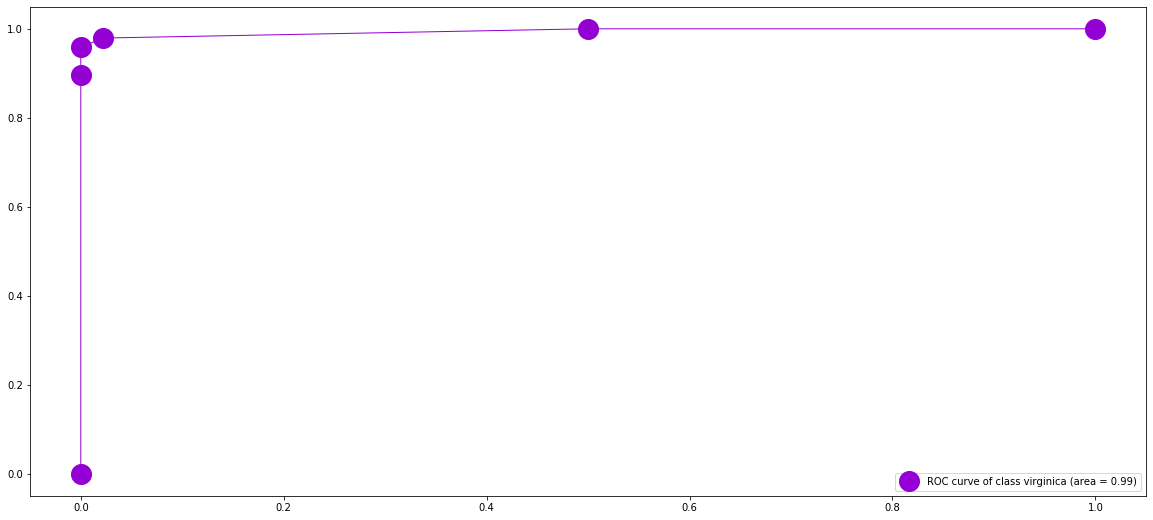

In [51]:
for i in range(0,3):
    plt.plot(fpr[i], tpr[i], lw=1, marker ='o', markersize=20, color = colors[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(iris.target_names[i], roc_auc[i]))
    plt.legend(loc="lower right")
    plt.show()